In [16]:
!pip install torchvision
!pip install pyro-ppl
!pip install matplotlib
!pip install tqdm


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


# Bayesian Neural Network

In [66]:
import os

import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from typing import List
from pyro.infer import SVI, Predictive, Trace_ELBO
from pyro.infer.autoguide import AutoNormal
from pyro.nn import PyroModule, PyroSample
from torch import randn
from torch.nn import Identity, LogSoftmax, ReLU, Sequential, Softmax
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch import Tensor
from torchvision.datasets import MNIST, CIFAR10
from tqdm import trange


# CONSTANTS

In [54]:
BATCH_SIZE = 128
EPOCH = 40

# MODEL

In [56]:
class BayesianMLP(PyroModule):
  def __init__(self, input_size:int = 784, output_size:int = 10):
    """
    creates a Bayesian MLP with input nodes of size input_size and output nodes of size output_size

    :param input_size: dimension of input
    :param output_size: dimension of output
    :return: BayesianMLP object
    """
    super().__init__()
    self.fc1 = PyroModule[nn.Linear](1024, input_size)
    self.fc1.weight = PyroSample(dist.Normal(0., 1.).expand([1024, input_size]).to_event(2))
    self.fc1.bias = PyroSample(dist.Normal(0., 1.).expand([1024]).to_event(1))
    self.fc2 = PyroModule[nn.Linear](output_size, 1024)
    self.fc2.weight = PyroSample(dist.Normal(0., 1.).expand([output_size, 1024]).to_event(2))
    self.fc2.bias = PyroSample(dist.Normal(0., 1.).expand([output_size]).to_event(1))
    self.relu = nn.ReLU()
    self.softmax = LogSoftmax(dim=1)
  
  def forward(self, input, output=None):
    """
    forwards input through the BayesianMLP

    :param input: input to the network
    :param output: observed variable
    :return: sampled output
    """
    out = self.fc1(input)
    out = self.relu(out)
    out = self.fc2(out)

    logits = self.softmax(out)

    with pyro.plate("data", out.shape[0]):
        return pyro.sample("obs", dist.Categorical(logits=logits), obs=output)

# DATASET PREPARATION

In [57]:
train_dataset = MNIST(
    root = os.getcwd(), 
    train = True, 
    download = True, 
    transform = transforms.Compose(
        [
          transforms.ToTensor(), 
          transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

train_loader = DataLoader(train_dataset, BATCH_SIZE, shuffle = True)

test_dataset = MNIST(
    root = os.getcwd(), 
    train = False, 
    download = True, 
    transform = transforms.Compose(
        [
          transforms.ToTensor(), 
          transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# TRAINING

Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.11it/s]


At epoch: 0 the loss was: 4751343.183026357


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.58it/s]


At epoch: 1 the loss was: 3532529.1672282377


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.22it/s]


At epoch: 2 the loss was: 2436744.8956352137


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.31it/s]


At epoch: 3 the loss was: 1529338.0400264165


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.10it/s]


At epoch: 4 the loss was: 864496.2155754431


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.16it/s]


At epoch: 5 the loss was: 450503.85421465104


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.11it/s]


At epoch: 6 the loss was: 233216.22652964946


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.44it/s]


At epoch: 7 the loss was: 132180.031463176


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.44it/s]


At epoch: 8 the loss was: 87190.24977963045


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.49it/s]


At epoch: 9 the loss was: 66769.6324028857


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.20it/s]


At epoch: 10 the loss was: 56539.6187197268


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.44it/s]


At epoch: 11 the loss was: 50965.34050164744


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.47it/s]


At epoch: 12 the loss was: 48277.17024314776


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.17it/s]


At epoch: 13 the loss was: 46267.32499425858


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.60it/s]


At epoch: 14 the loss was: 44935.11916195601


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.24it/s]


At epoch: 15 the loss was: 44133.78112894297


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.46it/s]


At epoch: 16 the loss was: 43363.161490656435


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.32it/s]


At epoch: 17 the loss was: 43221.800300017


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.41it/s]


At epoch: 18 the loss was: 42429.89156751335


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.99it/s]


At epoch: 19 the loss was: 42111.906178846955


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.92it/s]


At epoch: 20 the loss was: 41705.82100690156


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.35it/s]


At epoch: 21 the loss was: 41858.49648690969


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.53it/s]


At epoch: 22 the loss was: 41360.32131327689


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.91it/s]


At epoch: 23 the loss was: 41452.62125771493


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.10it/s]


At epoch: 24 the loss was: 40917.27993545681


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.71it/s]


At epoch: 25 the loss was: 40719.01121405512


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.01it/s]


At epoch: 26 the loss was: 40424.58570318669


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.62it/s]


At epoch: 27 the loss was: 40340.59591843933


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.88it/s]


At epoch: 28 the loss was: 40008.41429132223


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.91it/s]


At epoch: 29 the loss was: 39904.91870614886


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.56it/s]


At epoch: 30 the loss was: 39920.07426185906


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.41it/s]


At epoch: 31 the loss was: 39903.83296249807


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.08it/s]


At epoch: 32 the loss was: 39531.34138819575


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.56it/s]


At epoch: 33 the loss was: 39483.143574886024


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 22.39it/s]


At epoch: 34 the loss was: 39242.07673315704


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.17it/s]


At epoch: 35 the loss was: 39319.739766426384


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.43it/s]


At epoch: 36 the loss was: 39168.960543856025


Processed image 467: 100%|██████████| 468/468 [00:19<00:00, 23.41it/s]


At epoch: 37 the loss was: 39072.871697604656


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.08it/s]


At epoch: 38 the loss was: 39091.417410194874


Processed image 467: 100%|██████████| 468/468 [00:20<00:00, 23.05it/s]

At epoch: 39 the loss was: 38925.95010703057


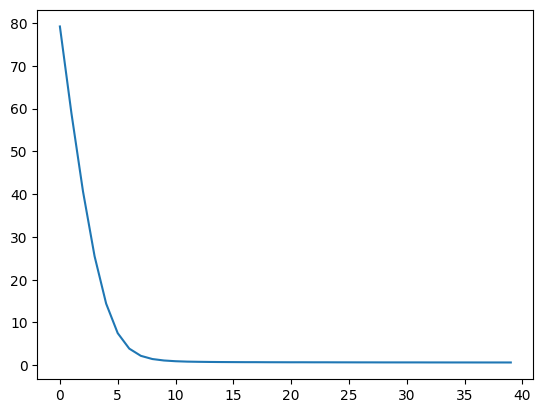

In [58]:
model = BayesianMLP()
guide = AutoNormal(model) # use Normal distribution as prior guide for SVI
adam = pyro.optim.Adam({"lr": 0.001}) # Adam optimizer for SVI
svi = SVI(model, guide, adam, loss=Trace_ELBO()) # specify ELBO loss using Stochastic Variational Inference

pyro.clear_param_store() # clear out any stored parameter from pyro 

epoch_losses = []

for e in range(EPOCH):
  loss = 0
  tbar = trange(len(train_loader.dataset)//BATCH_SIZE)
  for data, i in zip(train_loader, tbar):
    x = torch.flatten(data[0], start_dim = 1)
    y = data[1]
    tbar.set_description(f"Processed image {i}")
    loss += svi.step(x, y) / BATCH_SIZE
   
  epoch_loss = loss / len(train_loader.dataset)
  epoch_losses.append(epoch_loss)
  print(f"At epoch: {e} the loss was: {loss}")

plt.plot(epoch_losses)

# PREDICTION ON MNIST

In [64]:
def display_inference(display:int, images: List[Tensor], means: List[int], stds: List[float]):
    f, axes = plt.subplots(display, 2)
    for i in range(display):
        axes[i, 0].set_axis_off()
        axes[i, 1].set_axis_off()

        axes[i, 0].imshow(images[i], cmap = 'gray')
        axes[i, 1].text(0, 0, f"prediction = {means[i]}, std = {stds[i]}")

In [67]:
def calculate_inference(num_to_sample:int, dataset: Dataset, pred: Predictive):
    dataset = list(dataset)

    sampled = random.sample(dataset, k=num_to_sample)

    images = [sample[0].squeeze(0) for sample in sampled]
    predictions = [pred(sample[0].flatten(0).unsqueeze(0)) for sample in sampled]
    means = [round(prediction['obs'].T.numpy().mean(axis=1)[0]) for prediction in predictions]
    stds = [prediction['obs'].T.numpy().std(axis=1)[0] for prediction in predictions]

    return (images, means, stds)

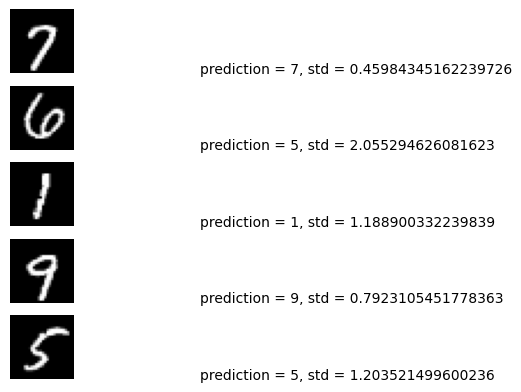

In [70]:
NUM_TO_DISPLAY = 5

pred = Predictive(model, guide=guide, num_samples=500)

display_inference(NUM_TO_DISPLAY, *calculate_inference(NUM_TO_DISPLAY, test_dataset, pred))

# PREDICTION ON CIFAR10

In [81]:
cifar_dataset = CIFAR10(
    root = os.getcwd(), 
    train = False, 
    download = True, 
    transform = transforms.Compose(
        [
          transforms.ToTensor(), 
          transforms.Resize((28, 28)),
          transforms.Grayscale(num_output_channels=1),
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
)

display_inference(NUM_TO_DISPLAY, *calculate_inference(NUM_TO_DISPLAY, cifar_dataset, pred))

Files already downloaded and verified


KeyboardInterrupt: 